## Plot SSM state

In [1]:
import matplotlib.pyplot as plt
import torch


In [2]:
%pwd

'/Data2/ZiHanCao/exps/panformer/notebooks'

In [3]:
index = 9
ssm_state_path = f'../visualized_img/feat_ssm_states/feat_ssm_states_{index}.pth'

ssm_state = torch.load(ssm_state_path)

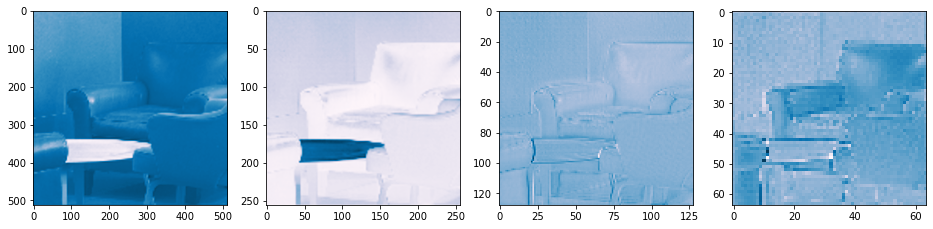

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    axes[i].imshow(ssm_state[i][0][0].mean(-1), cmap='PuBu')


In [5]:
ssm_state[2][1][None].shape

torch.Size([1, 1, 256, 32])

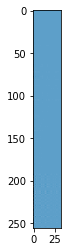

In [32]:
import torch.nn.functional as F

# h = F.interpolate(ssm_state[2][1][None], (128, 128), mode='bilinear')[0,0]
plt.Figure(figsize=(10, 10), dpi=200)
h = ssm_state[2][1][None][0,0]
# h -= h.min()
# h /= h.max()

plt.imshow(h, cmap='PuBu')
plt.show()

In [63]:
32*3*4, 32*2*4, 32*2*2*4
ssm_state[3][1].shape

(384, 256, 512)

In [18]:
## plot update xs

import torch
xs = torch.load('/Data2/ZiHanCao/exps/panformer/visualized_img/updated_xs/updated_xs_3.pth')


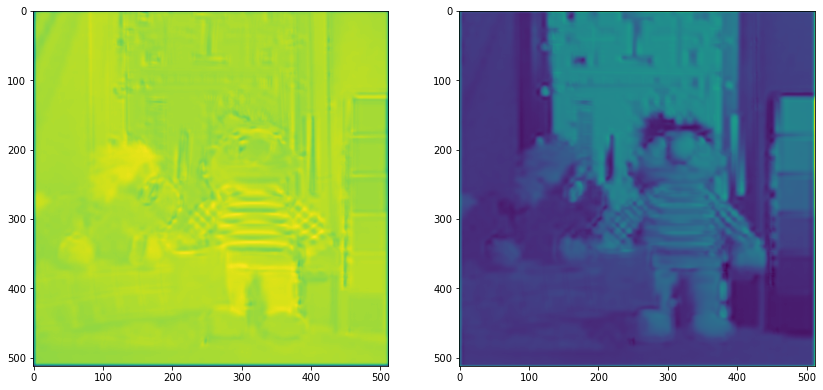

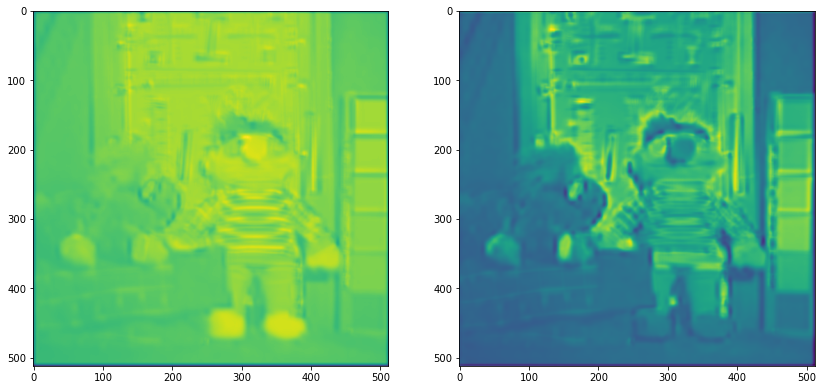

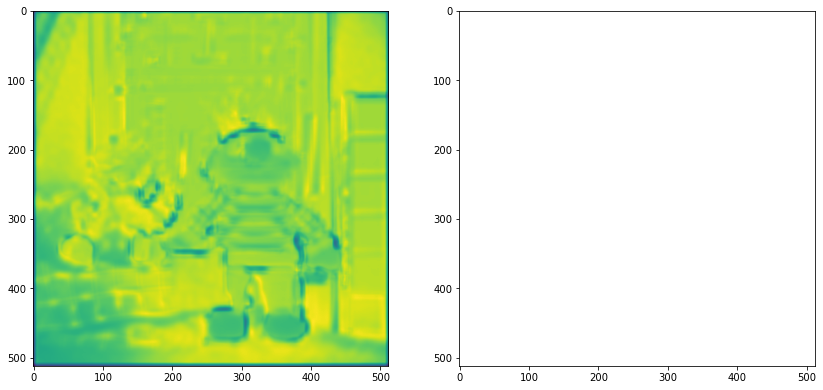

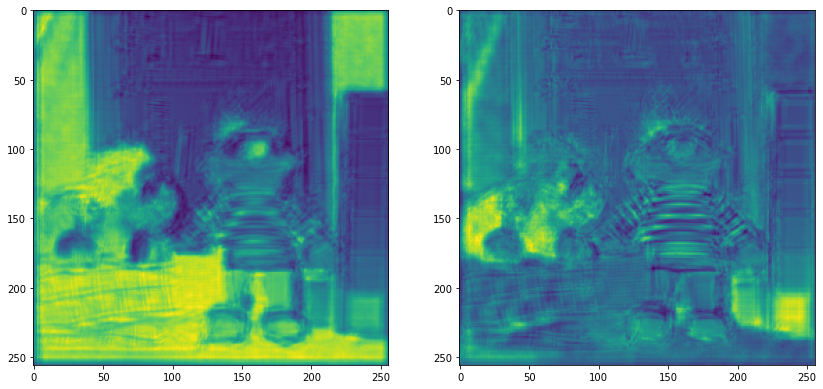

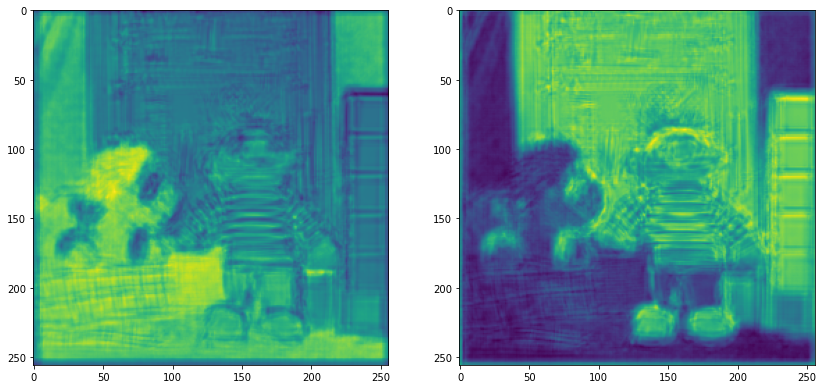

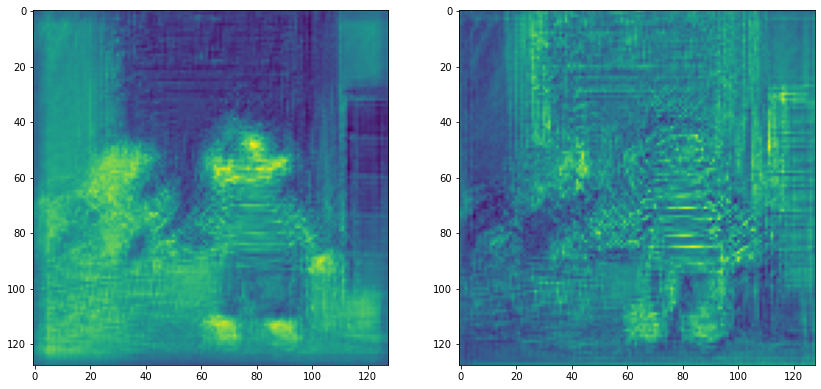

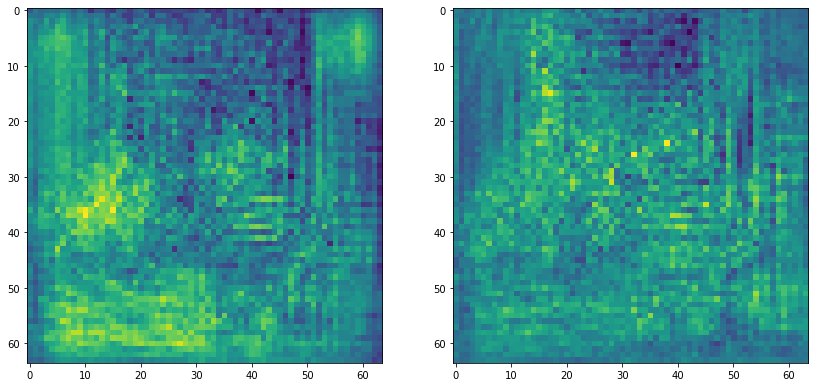

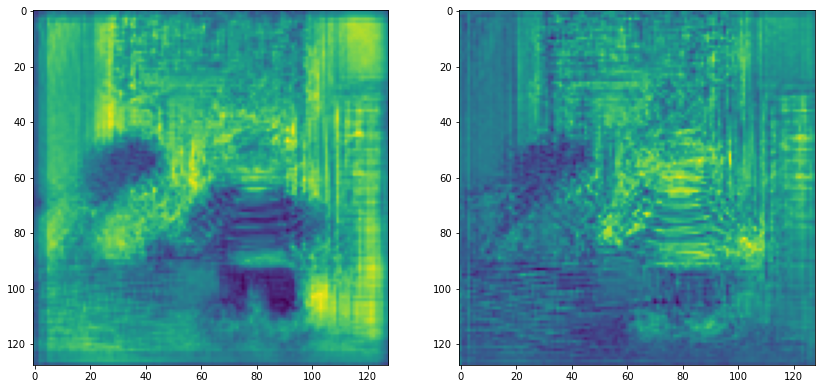

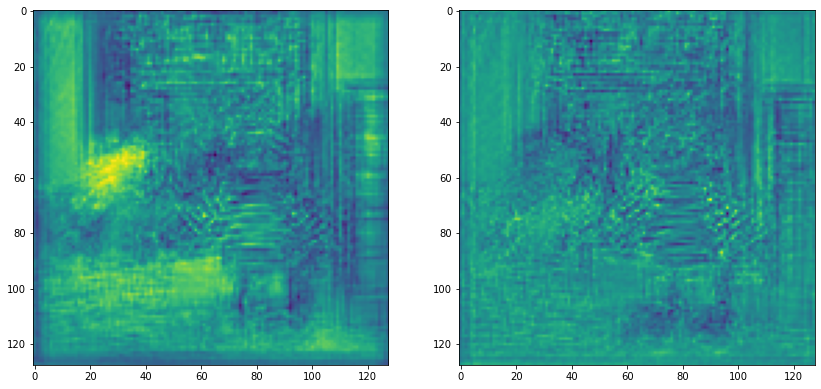

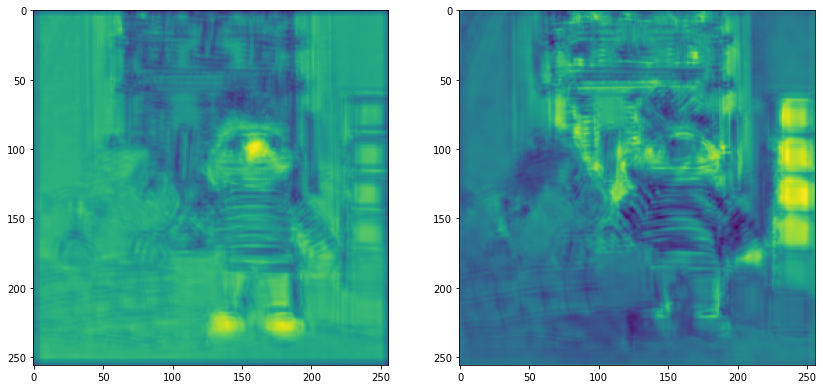

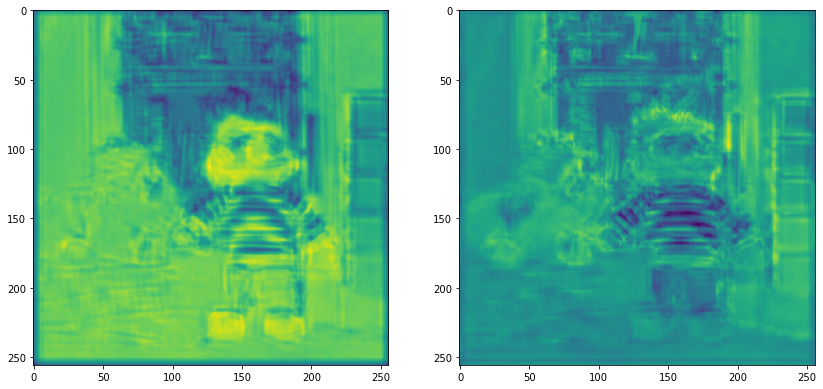

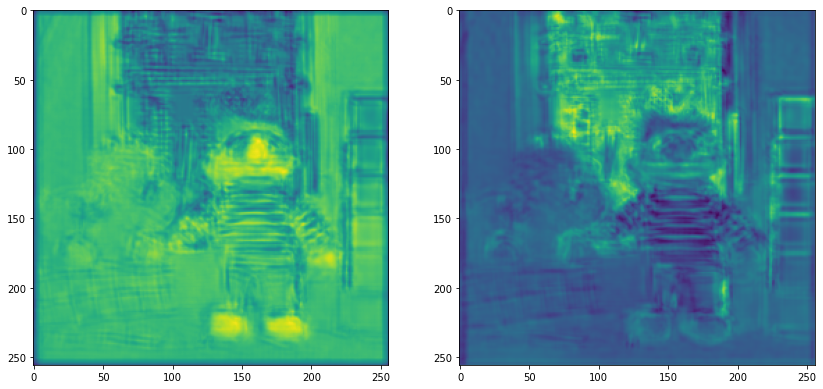

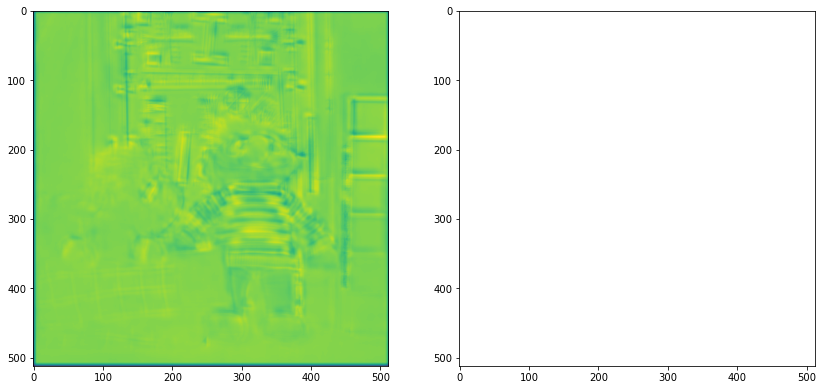

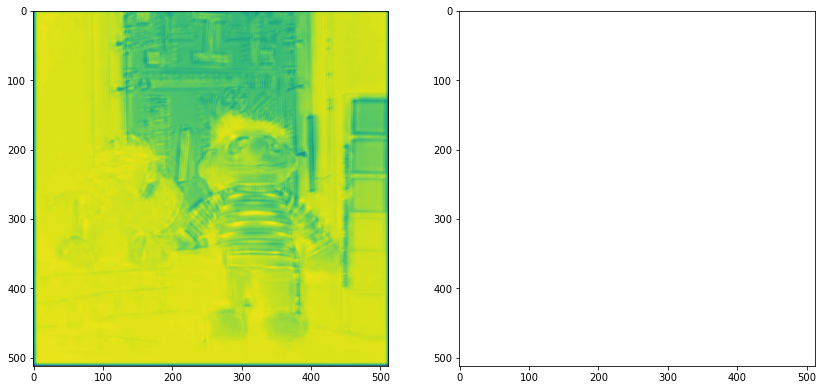

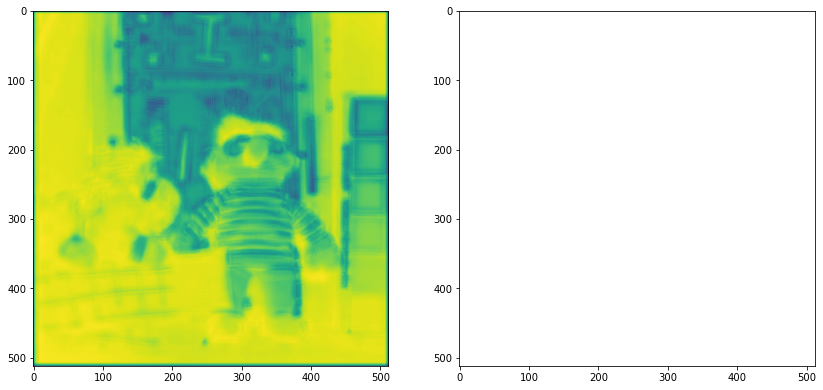

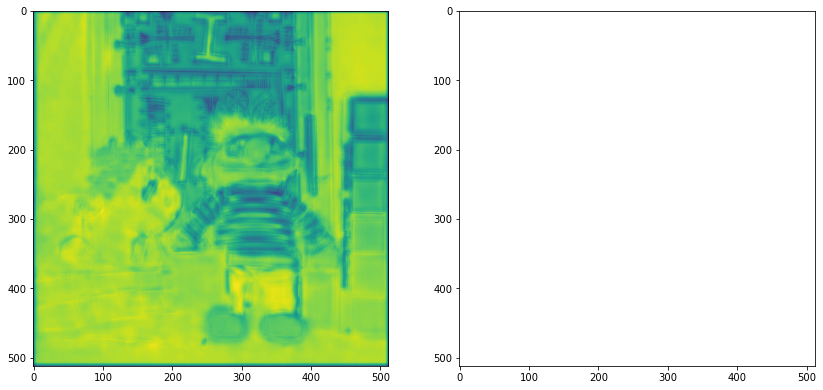

In [23]:
import math
import torch.nn.functional as F
import matplotlib.pyplot as plt

def to_feat_img(x):
    hw_square = x.shape[-1]
    h = w = int(math.sqrt(hw_square))
    x = x[:,0].reshape(1, -1, h, w).float()  # [1, D, H, W]
    # if h == 128:
    #     x = F.interpolate(x, (64, 64), mode='bilinear')
    x = x[0].mean(0)
    
    return x
    
for (ori_x, updated_x) in xs:
    if ori_x is not None or updated_x is not None:
        fig, axes = plt.subplots(1, 2, figsize=(14,7))
    
    if ori_x is not None:
        # print(ori_x.shape)
        axes[0].imshow(to_feat_img(ori_x))
        # axes[0].set_axis_off()
    
    if updated_x is not None:
        # print(updated_x.shape)
        axes[1].imshow(to_feat_img(updated_x))
        # axes[1].set_axis_off()
        
        
    # print('------------')

In [6]:
import math

math.sqrt(262144)

512.0